<div class="alert alert-block alert-danger">

# **Performance of the Eversense versus the Free Style Libre Flash glucose monitor during exercise and normal daily activities in subjects with type 1 diabetes mellitus**
    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, roc_curve, f1_score
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn import svm
from scipy.optimize import curve_fit
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import seaborn as sn
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import tree
# import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency, mood
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif, f_regression, mutual_info_regression, f_classif

from random import choices

import shap

In [2]:
dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")

dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

feature = "Patiënt ID"
elset = list(set(dfw1[feature].tolist()))

dfw1_dict = {idd: dfw1.loc[dfw1['Patiënt ID'] == idd] for idd in elset}
dfw2_dict = {idd: dfw2.loc[dfw2['Patiënt ID'] == idd] for idd in elset}

In [3]:
dfw1["Period"] = ['PA']*dfw1.shape[0]
dfw2["Period"] = ['NDA']*dfw2.shape[0]

dff = pd.concat([dfw1, dfw2], axis=0)

In [4]:
dfw1['Datum'] = dfw1['Datum'].str[0:10]
dfw2['Datum'] = dfw2['Datum'].str[0:10]

dfw1_dict = {idd: dfw1.loc[dfw1['Patiënt ID'] == idd] for idd in elset}
dfw2_dict = {idd: dfw2.loc[dfw2['Patiënt ID'] == idd] for idd in elset}

In [5]:
# FSL
w170_fsl = dfw1[dfw1["FSL (mg/dL)"] <= 70]
w270_fsl = dfw2[dfw2["FSL (mg/dL)"] <= 70]
w1180_fsl = dfw1.loc[(dfw1["FSL (mg/dL)"] <= 180) & (dfw1["FSL (mg/dL)"] > 70)]
w2180_fsl = dfw2.loc[(dfw2["FSL (mg/dL)"] <= 180) & (dfw2["FSL (mg/dL)"] > 70)]
w1max_fsl = dfw1[dfw1["FSL (mg/dL)"] > 180]
w2max_fsl = dfw2[dfw2["FSL (mg/dL)"] > 180]

#Eversense
w170_es = dfw1[dfw1["Eversense (mg/dl)"] <= 70]
w270_es = dfw2[dfw2["Eversense (mg/dl)"] <= 70]
w1180_es = dfw1.loc[(dfw1["Eversense (mg/dl)"] <= 180) & (dfw1["Eversense (mg/dl)"] > 70)]
w2180_es = dfw2.loc[(dfw2["Eversense (mg/dl)"] <= 180) & (dfw2["Eversense (mg/dl)"] > 70)]
w1max_es = dfw1[dfw1["Eversense (mg/dl)"] > 180]
w2max_es = dfw2[dfw2["Eversense (mg/dl)"] > 180]

#Fingerprick
w170_fp = dfw1[dfw1["Fingerprick (mg/dL)"] <= 70]
w270_fp = dfw2[dfw2["Fingerprick (mg/dL)"] <= 70]
w1180_fp = dfw1.loc[(dfw1["Fingerprick (mg/dL)"] <= 180) & (dfw1["Fingerprick (mg/dL)"] > 70)]
w2180_fp = dfw2.loc[(dfw2["Fingerprick (mg/dL)"] <= 180) & (dfw2["Fingerprick (mg/dL)"] > 70)]
w1max_fp = dfw1[dfw1["Fingerprick (mg/dL)"] > 180]
w2max_fp = dfw2[dfw2["Fingerprick (mg/dL)"] > 180]

In [6]:
dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")


dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

dfw1['Datum'] = dfw1['Datum'].str[11:13]
dfw2['Datum'] = dfw2['Datum'].str[11:13]
dfw1['Datum'] = dfw1['Datum'].astype(float)
dfw2['Datum'] = dfw2['Datum'].astype(float)

In [7]:
madrugadaw1 = dfw1.loc[(dfw1["Datum"] < 6)]
mañanaw1 = dfw1.loc[(dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)]
tardew1 = dfw1.loc[(dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)]
nochew1 = dfw1.loc[(dfw1["Datum"] >= 18)]

madrugadaw2 = dfw2.loc[(dfw2["Datum"] < 6)]
mañanaw2 = dfw2.loc[(dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)]
tardew2 = dfw2.loc[(dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)]
nochew2 = dfw2.loc[(dfw2["Datum"] >= 18)]

<div class="alert alert-block alert-danger">
    
# **CLASSIFICATION**
    
</div>

<div class="alert alert-block alert-warning">
    
## FEATURE EXTRACTION
    
</div>

In [8]:
cols = ["Index", "FullSumValues","FullMedian","FullVar","FullEntropy", "FullHyper", "FullHypo", "FullAdverse",
        "DawnSumValues","DawnMedian","DawnVar","DawnEntropy","DawnHyper", "DawnHypo", "DawnAdverse",
        "MorningSumValues","MorningMedian", "MorningVar","MorningEntropy","MorningHyper", "MorningHypo", "MorningAdverse",
        "AftSumValues","AftMedian","AftVar","AftEntropy","AftHyper", "AftHypo", "AftAdverse", "NightSumValues","NightMedian",
        "NightVar","NightEntropy","NightHyper", "NightHypo", "NightAdverse","Cat"] 
tabdf = pd.DataFrame(columns = cols)

In [9]:
h = "FSL (mg/dL)"
elsettt = [1,2,3,5,6,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25]

for e in elsettt:
    tabdf = tabdf.append({"Index" : e,
    "FullSumValues" : dfw1[h].loc[(dfw1['Patiënt ID'] == e)].sum(),
    "FullMedian" : dfw1[h].loc[(dfw1['Patiënt ID'] == e)].median(),
    "FullVar" : dfw1[h].loc[(dfw1['Patiënt ID'] == e)].var(),
    "FullEntropy": stats.entropy(dfw1[h].loc[(dfw1['Patiënt ID'] == e)].to_list()),
    "FullHyper" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] > 180)].count(),
    "FullHypo" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70)].count(),
    "FullAdverse" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70)].count() + dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] >180)].count(),
    "DawnSumValues" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] < 6)].sum(),
    "DawnMedian" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] < 6)].median(),
    "DawnVar" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] < 6)].var(),
    "DawnEntropy": stats.entropy(dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] < 6)].to_list()),
    "DawnHyper" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] > 180) & (dfw1["Datum"] < 6)].count(),
    "DawnHypo" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] < 6)].count(),
    "DawnAdverse" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] < 6)].count() + dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] >180) & (dfw1["Datum"] < 6)].count(),
    "MorningSumValues" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].sum(),
    "MorningMedian" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].median(),
    "MorningVar" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].var(),
    "MorningEntropy": stats.entropy(dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].to_list()),
    "MorningHyper" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] > 180) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].count(),
    "MorningHypo" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].count(),
    "MorningAdverse" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70)& (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].count() + dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] >180) & (dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)].count(),
    "AftSumValues" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].sum(),
    "AftMedian" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].median(),
    "AftVar" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].var(),
    "AftEntropy": stats.entropy(dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].to_list()),
    "AftHyper" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] > 180) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].count(),
    "AftHypo" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].count(),
    "AftAdverse" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].count() + dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] >180) & (dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)].count(),
    "NightSumValues" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 18)].sum(),
    "NightMedian" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 18)].median(),
    "NightVar" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 18)].var(),
    "NightEntropy": stats.entropy(dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1["Datum"] >= 18)].to_list()),
    "NightHyper" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] > 180) & (dfw1["Datum"] >= 18)].count(),
    "NightHypo" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] >= 18)].count(),
    "NightAdverse" : dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] < 70) & (dfw1["Datum"] >= 18)].count() + dfw1[h].loc[(dfw1['Patiënt ID'] == e) & (dfw1[h] >180) & (dfw1["Datum"] >= 18)].count(),
    "Cat" : 0}, ignore_index = True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [10]:
h = "FSL (mg/dL)"
for e in elsettt:
    tabdf = tabdf.append({"Index" : e,
    "FullSumValues" : dfw2[h].loc[(dfw2['Patiënt ID'] == e)].sum(),
    "FullMedian" : dfw2[h].loc[(dfw2['Patiënt ID'] == e)].median(),
    "FullVar" : dfw2[h].loc[(dfw2['Patiënt ID'] == e)].var(),
    "FullEntropy": stats.entropy(dfw2[h].loc[(dfw2['Patiënt ID'] == e)].to_list()),
    "FullHyper" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] > 180)].count(),
    "FullHypo" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70)].count(),
    "FullAdverse" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70)].count() + dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70)].count(),
    "DawnSumValues" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] < 6)].sum(),
    "DawnMedian" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] < 6)].median(),
    "DawnVar" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] < 6)].var(),
    "DawnEntropy": stats.entropy(dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] < 6)].to_list()),
    "DawnHyper" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] > 180) & (dfw2["Datum"] < 6)].count(),
    "DawnHypo" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] < 6)].count(),
    "DawnAdverse" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] < 6)].count() + dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] >180) & (dfw2["Datum"] < 6)].count(),
    "MorningSumValues" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].sum(),
    "MorningMedian" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].median(),
    "MorningVar" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].var(),
    "MorningEntropy": stats.entropy(dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].to_list()),
    "MorningHyper" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] > 180) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].count(),
    "MorningHypo" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].count(),
    "MorningAdverse" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].count() + dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] >180) & (dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)].count(),
    "AftSumValues" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].sum(),
    "AftMedian" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].median(),
    "AftVar" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].var(),
    "AftEntropy": stats.entropy(dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].to_list()),
    "AftHyper" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] > 180) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].count(),
    "AftHypo" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].count(),
    "AftAdverse" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].count()+ dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] >180) & (dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)].count(),
    "NightSumValues" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 18)].sum(),
    "NightMedian" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 18)].median(),
    "NightVar" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 18)].var(),
    "NightEntropy": stats.entropy(dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2["Datum"] >= 18)].to_list()),
    "NightHyper" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] > 180) & (dfw2["Datum"] >= 18)].count(),
    "NightHypo" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] >= 18)].count(),
    "NightAdverse" : dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] < 70) & (dfw2["Datum"] >= 18)].count() + dfw2[h].loc[(dfw2['Patiënt ID'] == e) & (dfw2[h] >180) & (dfw2["Datum"] >= 18)].count(),
    "Cat" : 1}, ignore_index = True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [11]:
tabdf.head()

Index FullSumValues FullMedian      FullVar FullEntropy FullHyper FullHypo  \
0   1.0     8863.6752  173.85054  6891.956285    3.737816      21.0      2.0   
1   2.0    7687.25652  173.85054  6225.422225    3.650275      16.0      1.0   
2   3.0    7523.31456   184.6599  5922.880452    3.648153      22.0      2.0   
3   5.0    7139.58228  145.92636  3400.717561    3.788645      10.0      0.0   
4   6.0   10904.84268  205.37784   7972.60076    3.842342      30.0      0.0   

  FullAdverse DawnSumValues DawnMedian  ... AftHypo AftAdverse NightSumValues  \
0        23.0     266.63088  266.63088  ...     0.0        6.0     2704.14156   
1        17.0           0.0        NaN  ...     0.0        7.0      453.99312   
2        24.0           0.0        NaN  ...     0.0       12.0      1315.1388   
3        10.0           0.0        NaN  ...     0.0        4.0      812.50356   
4        30.0           0.0        NaN  ...     0.0       10.0     3617.53248   

  NightMedian      NightVar NightEntropy NightHyper NightHypo NightAdverse  \
0   165.74352   5304.484215     2.627027        7.0       2.0          9.0   
1   127.00998   1763.452682      1.32686        0.0       1.0          1.0   
2   181.05678  16685.940742     1.643285        3.0       1.0          4.0   
3   106.29204   1552.332931     1.901352        1.0       0.0          1.0   
4   227.89734    6662.60552     2.705495       12.0       0.0         12.0   

   Cat  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 37 columns]

In [12]:
tabdf = tabdf.replace(np.nan,0)

In [13]:
tabdf.set_index("Index", inplace = True)

In [14]:
tabdf_mor = tabdf
tabdf_aft = tabdf
tabdf_dawn = tabdf
tabdf_night = tabdf
tabdf_full = tabdf

In [15]:
tabdf_full = tabdf.copy()

In [16]:
corr_matrix = tabdf.corr()
# plt.figure(figsize = (20,20))
# sns.heatmap(corr_matrix, annot = False);

corr_pairs = corr_matrix.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

In [17]:
upper_pairs = sorted_pairs[(sorted_pairs >= 0.7) & (sorted_pairs != 1)]
upper = pd.DataFrame(upper_pairs)
upper.columns = ["Corr"]

In [18]:
upper_res = upper.drop_duplicates(subset=['Corr'], keep='first')

In [19]:
tabdf["Patients"] = list(tabdf.index)
tabdf_later = tabdf.copy()

In [20]:
eliminate_feat = [i[1] for i in upper_res.index]

In [21]:
tabdf.drop(eliminate_feat, axis = 1, inplace= True)

<div class="alert alert-block alert-warning">
    
## FEATURE SELECTION
    
</div>

In [22]:
import random

In [23]:
elsettt = [1,2,3,5,6,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25]

#train_idx = random.sample(elsettt, 16)
train_idx = [22, 21, 2, 10, 1, 3, 6, 11, 24, 9, 19, 8, 5, 17, 25, 14]
#test_idx = list(set(elsettt) - set(train_idx))
test_idx = [12, 13, 15, 18, 20, 23]

tabdf["Patients"] = list(tabdf.index)
tabdf_full["Patients"] = list(tabdf.index)

X = tabdf.drop(columns = "Cat")
y = tabdf[["Cat", "Patients"]]

In [24]:
X_train = X[X["Patients"].isin(train_idx)]
X_test = X[X["Patients"].isin(test_idx)]
y_train = y[y["Patients"].isin(train_idx)]
y_test = y[y["Patients"].isin(test_idx)]

X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train))
X_train_norm.columns = X.columns
X_test_norm = pd.DataFrame(scaler.transform(X_test))
X_test_norm.columns = X.columns

In [25]:
X_train_df = pd.DataFrame(X_train, columns = X_train_norm.columns)

In [26]:
featnames = list(X.columns)

### FILTER METHODS

In [27]:
def mutualinfo(X,y):
    # do calculations
    mutual = mutual_info_classif(X, y, random_state = 8)
    mutual /= np.max(mutual)

    zipped_pairs = zip(list(mutual), list(X.columns))
    mutualinfo_var = [x for _, x in sorted(zipped_pairs, reverse = True)] 

    dff = pd.DataFrame({"Var":X.columns,"Score":mutual})
    plt.figure(figsize=(20,10))
    sns.barplot(x='Var', y="Score", data=dff, order=dff.sort_values('Score',ascending = False).Var, color = "blue")
    plt.xticks(rotation=90)
    plt.xlabel('Selected features')
    plt.ylabel('Mutual Information Score')
    plt.title('Mutual Information Feature Selection')

    plt.show()
    
    return mutualinfo_var

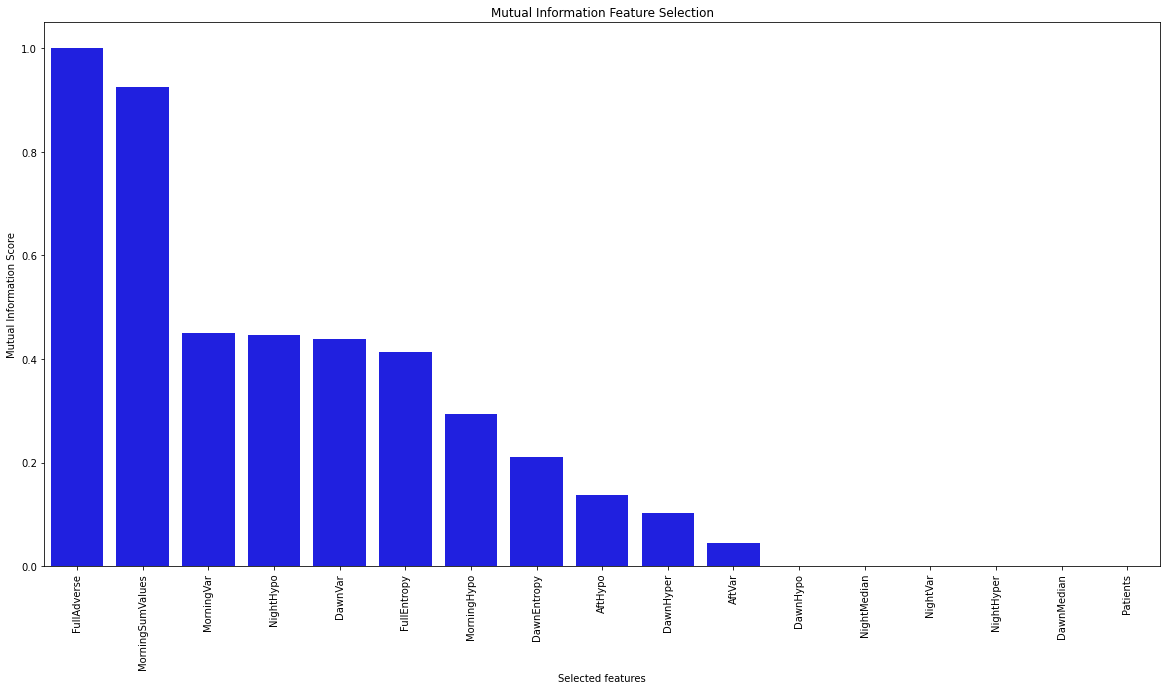

In [28]:
mutualinfo_var = mutualinfo(X_train_df,y_train["Cat"])

In [29]:
mutualinfo_var = mutualinfo_var[:11]

In [30]:
def chi2fs(X,y):

    test = SelectKBest(score_func=chi2, k="all")
    fit = test.fit(X, y)

    zipped_pairs = zip(list(fit.scores_), list(X.columns))
    chi2_var = [x for _, x in sorted(zipped_pairs, reverse = True)]                 

    dff = pd.DataFrame({"Var":list(X.columns),"Score":fit.scores_})
    plt.figure(figsize=(20,10))
    sns.barplot(x='Var', y="Score", data=dff, order=dff.sort_values('Score',ascending = False).Var, color = "blue")
    plt.xticks(rotation=90)
    plt.xlabel('Selected features')
    plt.ylabel('Chi Squared Score')
    plt.title('Chi Squared Feature Selection')

    return chi2_var

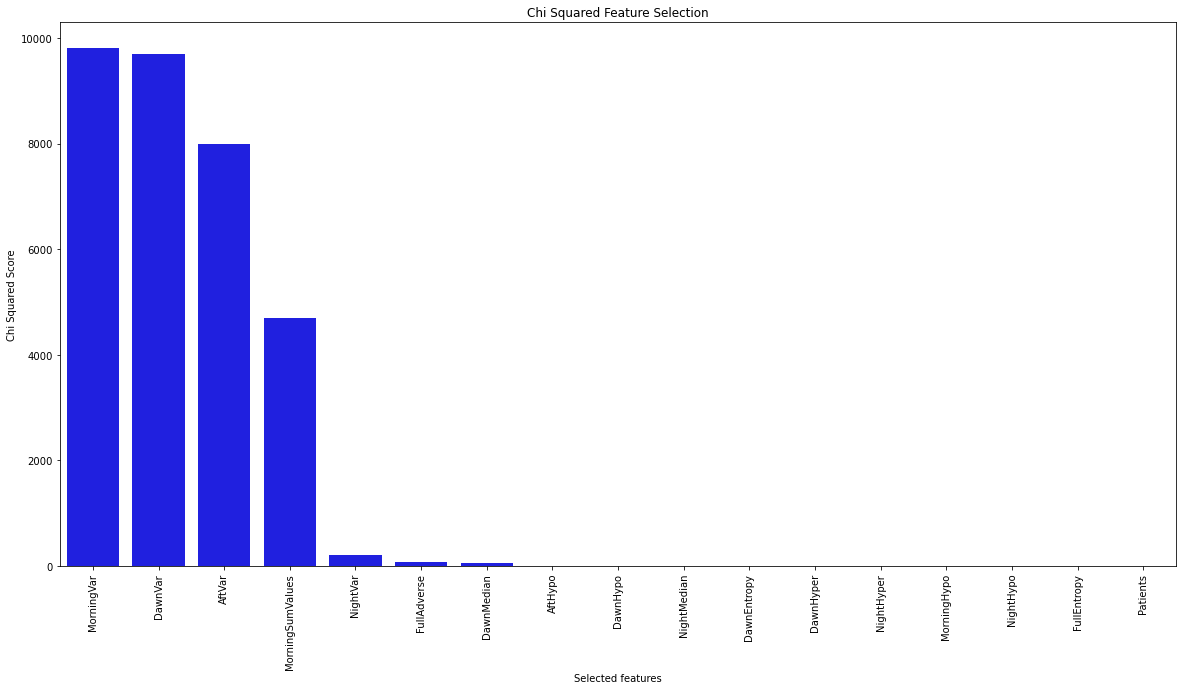

In [31]:
chi2_var = chi2fs(X_train_df,y_train["Cat"])

In [32]:
chi2_var = chi2_var[0:7]

### EMBEDDED  METHODS

In [33]:
def dtfs(X_train_norm, y, param_grid, featnames):

    clf = GridSearchCV(DecisionTreeClassifier(random_state = 8), param_grid, cv=5, return_train_score=False)
    clf.fit(X_train_norm, y_train)

    dt_params = clf.best_params_
    features = X_train_norm.columns
    dt = DecisionTreeClassifier(**dt_params, random_state = 8)
    dt.fit(X_train_norm, y_train)

    dt_imp = dt.feature_importances_

    zipped_pairs = zip(list(dt_imp), features)
    dt_var = [x for _, x in sorted(zipped_pairs, reverse = True)]

    dff = pd.DataFrame({"Var":features,"Score":dt_imp})
    plt.figure(figsize=(20,10))
    sns.barplot(x='Var', y="Score", data=dff, order=dff.sort_values('Score',ascending = False).Var, color = "blue")
    plt.xticks(rotation=90)
    plt.xlabel('Selected features')
    plt.ylabel('Decision Tree Scores')
    plt.title('$Decision Tree$ Feature Selection')
    
    return dt_var, dt_params

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

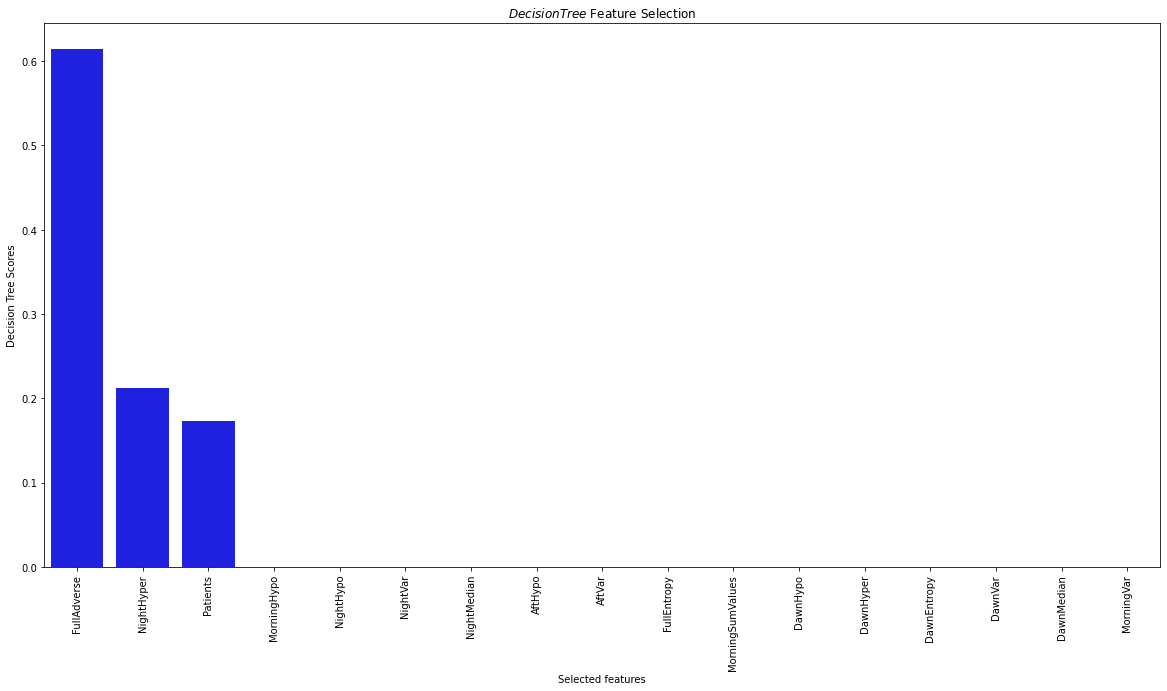

In [34]:
dt_var, dt_params = dtfs(X_train_df, y_train['Cat'].to_list(), {"criterion": ["gini", "entropy"],"max_depth": [2,5,10,15,20,25],"min_samples_split": [2,5,10,15,20,25],"min_samples_leaf": [2,5,10,15,20,25]}, featnames)

In [35]:
dt_var = dt_var[0:3]

In [36]:
def rffs(X_train_norm, y, param_grid, featnames):

    clf2 = GridSearchCV(RandomForestClassifier(random_state = 8), param_grid, cv=5, return_train_score=False)
    clf2.fit(X_train_norm, y_train)

    rf_params = clf2.best_params_
    features = X_train_norm.columns
    rforest = RandomForestClassifier(**rf_params, random_state = 8)
    rforest.fit(X_train_norm, y_train)

    rf_imp = rforest.feature_importances_

    zipped_pairs = zip(list(rf_imp), list(X_train_norm.columns))
    rf_var = [x for _, x in sorted(zipped_pairs, reverse = True)]

    dff = pd.DataFrame({"Var":features,"Score":rf_imp})
    plt.figure(figsize=(20,10))
    sns.barplot(x='Var', y="Score", data=dff, order=dff.sort_values('Score',ascending = False).Var, color = "blue")
    plt.xticks(rotation=90)
    plt.xlabel('Selected features')
    plt.ylabel('Random Forest Scores')
    plt.title('$Random Forest$ Feature Selection')

    return rf_var, rf_params

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: multiclass-multi

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass

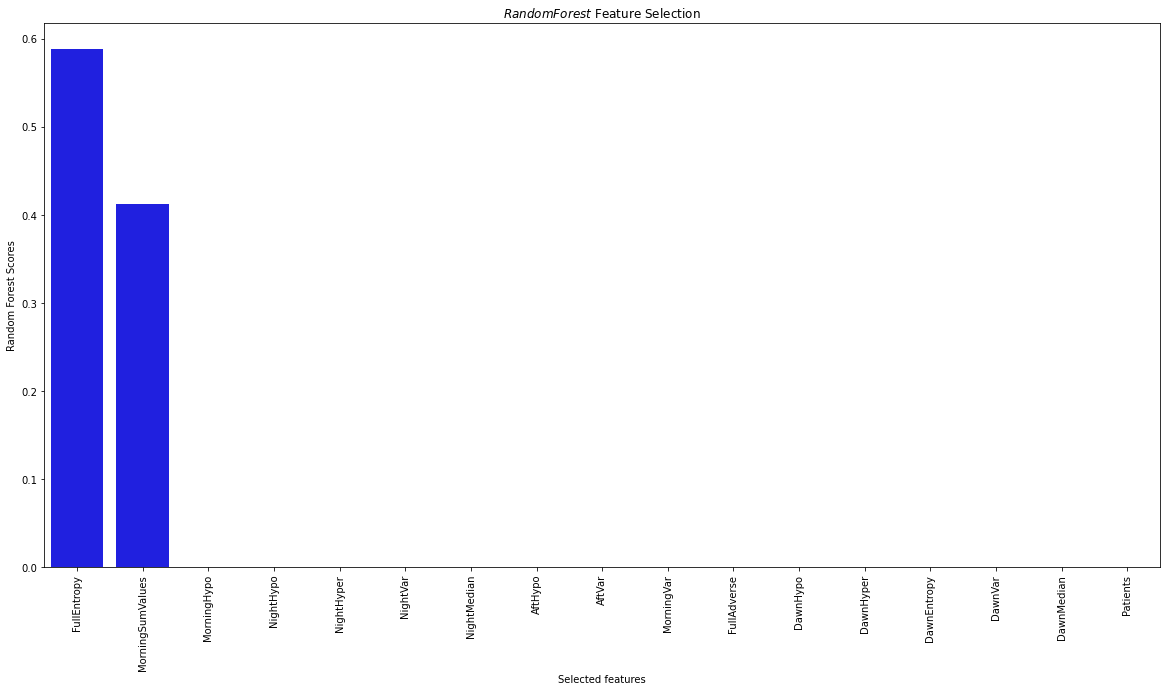

In [37]:
rf_var, rf_params = rffs(X_train_df, y_train['Cat'].to_list(), {"n_estimators":np.arange(1,15,5),
    "criterion": ["gini", "entropy"],
    "max_depth": [2,5,10,15],
    "min_samples_split": [5,10,15,20,25],
    "min_samples_leaf": [5,10,15,20,25]}, featnames)

In [38]:
rf_var = rf_var[:2]

In [39]:
def lassofs(x_train, y_train, param_grid, featnames):

    clf3 = GridSearchCV(LogisticRegression(max_iter = 10000,random_state = 8), param_grid, cv=5, return_train_score=False)
    clf3.fit(x_train, y_train)
    lr_params = clf3.best_params_

    model = LogisticRegression(**lr_params, random_state = 8, penalty='l1', solver='liblinear', max_iter = 1000)
    model.fit(x_train, y_train)

    lr_imp =  np.abs(model.coef_[0])

    zipped_pairs = zip(list(lr_imp), list(X.columns))
    lr_var = [x for _, x in sorted(zipped_pairs, reverse = True)]

    dff = pd.DataFrame({"Var":featnames,"Score":lr_imp})
    plt.figure(figsize=(20,10))
    sns.barplot(x='Var', y="Score", data=dff, order=dff.sort_values('Score',ascending = False).Var, color = "blue")
    plt.xticks(rotation=90)
    plt.xlabel('Selected features')
    plt.ylabel('LASSO Scores')
    plt.title('$LASSO$ Feature Selection')

    return lr_var, lr_params

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


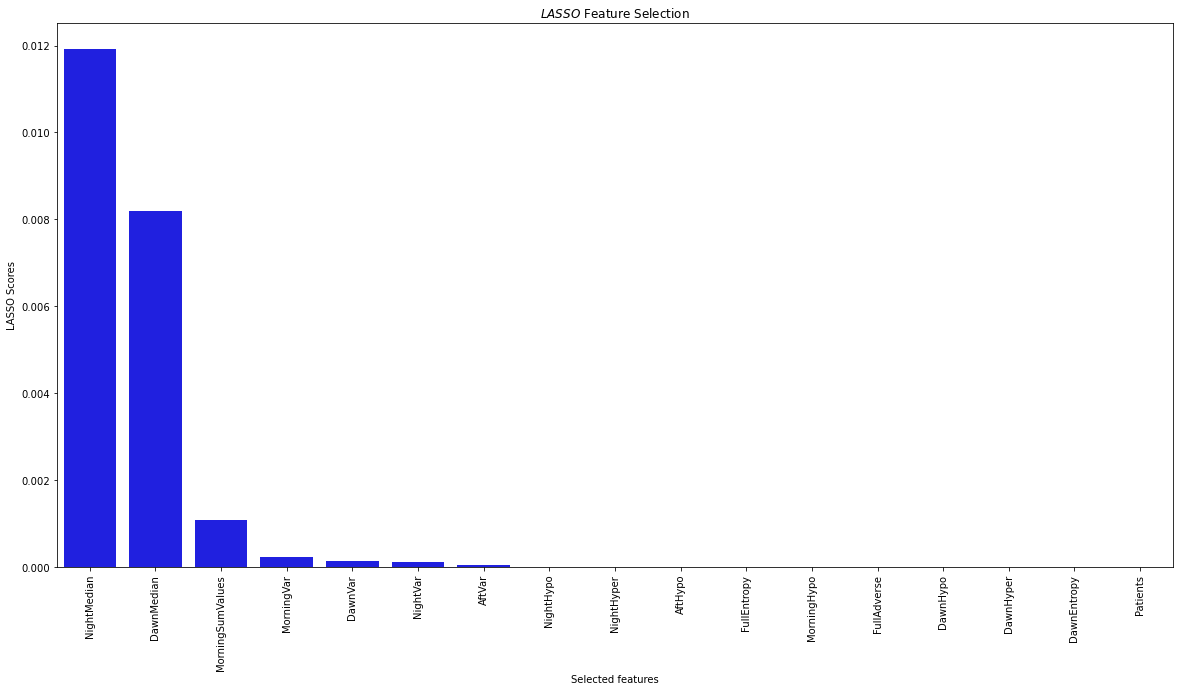

In [40]:
lr_var, lr_params = lassofs(X_train, y_train['Cat'].to_list(), {"C": [0.01, 0.001, 0.1, 1, 10]}, featnames)

In [41]:
lr_var = lr_var[0:7]

### WRAPPER METHODS

In [43]:
mutual = mutual_info_classif(X, y["Cat"], random_state = 8)
mutual /= np.max(mutual)

dfff = pd.DataFrame({"Var":X.columns,"Score":mutual})
plt.figure(figsize=(20,10))
dfff = dfff.sort_values('Score',ascending = False)
ranking = dfff["Var"].to_list()

<Figure size 1440x720 with 0 Axes>

In [44]:
x_train_norm = np.array(X_train_norm)
X_train = np.array(X_train)

y_train2 = np.array(y_train["Cat"])

x_test_norm = np.array(X_test_norm)
y_test2 = np.array(y_test["Cat"])

#### KNN

In [45]:
clf4 = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": np.arange(1,14,2)}, cv=5, return_train_score=False)
clf4.fit(X_train, y_train2)
knn_params = clf4.best_params_
knn = KNeighborsClassifier(**knn_params)

In [46]:
N, D = X_train_norm.shape
D

17

In [47]:
### KNN

N, D = X_train_norm.shape

dt = DecisionTreeClassifier(**dt_params, random_state = 8)
kf = KFold(n_splits=5, shuffle = True, random_state = 8)

cv_error = []
cv_std = []

for n in range(1, D+1, 1):
        
    error_i = []
    for train, validation in kf.split(X_train):
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)]
        Xs = X_train[:,selected]
        
        knn.fit(Xs[train],y_train2[train])
        prediction = knn.predict(Xs[validation])
        error = mean_squared_error(y_train2[validation], prediction)
        error_i.append(error) 
            
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))

In [48]:
cv_error

[0.34285714285714286,
 0.34285714285714286,
 0.34285714285714286,
 0.34285714285714286,
 0.34285714285714286,
 0.34285714285714286,
 0.34285714285714286,
 0.4428571428571428,
 0.4428571428571428,
 0.4095238095238095,
 0.4095238095238095,
 0.4095238095238095,
 0.4095238095238095,
 0.4095238095238095,
 0.6571428571428571,
 0.6571428571428571,
 0.7190476190476189]

In [49]:
index_knn = 10

#### LR

In [50]:
### LR

clf3 = GridSearchCV(LogisticRegression(max_iter = 10000,random_state = 8), {"C": [0.01, 0.001, 0.1, 1, 10]}, cv=5, return_train_score=False)
clf3.fit(X_train, y_train2)
lr_params = clf3.best_params_

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [51]:
### LR

N, D = X_train.shape

dt = DecisionTreeClassifier(**dt_params,random_state=8)
kf = KFold(n_splits=3, shuffle = True, random_state=8)

cv_error = []
cv_std = []

for n in range(1, D+1, 1):
        
    error_i = []
    for train, validation in kf.split(X_train):
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)]
        Xs = X_train[:,selected]
        
        #-- fit on selected features
        lr = LogisticRegression(**lr_params, random_state = 8,penalty='l1', solver='liblinear', max_iter = 1000)
        lr.fit(Xs[train],y_train2[train])
        prediction = lr.predict(Xs[validation])
        error = mean_squared_error(y_train2[validation], prediction)
        error_i.append(error) 
            
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))

In [52]:
cv_error

[0.4696969696969697,
 0.503030303030303,
 0.503030303030303,
 0.503030303030303,
 0.503030303030303,
 0.503030303030303,
 0.4696969696969697,
 0.5606060606060607,
 0.5606060606060607,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.6848484848484849,
 0.5333333333333333,
 0.503030303030303]

In [53]:
index_lr = 10

#### DT

In [54]:
### DT

N, D = x_train_norm.shape

dt = DecisionTreeClassifier(**dt_params,random_state=8)
kf = KFold(n_splits=3, shuffle = True, random_state=8)

cv_error = []
cv_std = []

for n in range(1, D+1, 1):
        
    error_i = []
    for train, validation in kf.split(X_train):
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)]
        Xs = X_train[:,selected]
        
        #-- fit on selected features
        dt.fit(Xs[train],y_train2[train])
        prediction = dt.predict(Xs[validation])
        error = mean_squared_error(y_train2[validation], prediction)
        error_i.append(error) 
            
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))

In [55]:
cv_error

[0.3757575757575758,
 0.3090909090909091,
 0.34242424242424246,
 0.3090909090909091,
 0.3090909090909091,
 0.34242424242424246,
 0.3090909090909091,
 0.21818181818181817,
 0.2515151515151515,
 0.21818181818181817,
 0.2818181818181818,
 0.4696969696969697,
 0.5,
 0.4696969696969697,
 0.4969696969696969,
 0.7454545454545455,
 0.7484848484848484]

In [56]:
index_dt = 7

In [57]:
knnw_list = ranking[0:index_knn]
dtw_list = ranking[0:index_dt]
lrw_list = ranking[0:index_lr]

<div class="alert alert-block alert-warning">
    
### FEATURE SELECTION RESULTS
    
</div>

In [58]:
def results_fs(listoflists):

    maxLength = max(map(len, listoflists))

    for i in listoflists:
        b = ['---'] * (maxLength-len(i))
        i.extend(b)

    results = pd.DataFrame(listoflists)
    results = results.transpose()
    results["Order of importance"] = range(0, maxLength)
    results.set_index("Order of importance", inplace=True)

    freq = list(np.unique(results.values, return_counts=True)[1][1:])
    variables = list(np.unique(results.values, return_counts=True)[0][1:])

    dff = pd.DataFrame({"Var":variables,"Score":freq})
    plt.figure(figsize=(20,10))
    sns.barplot(x='Var', y="Score", data=dff, order=dff.sort_values('Score',ascending = False).Var, color = "blue")
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Feature frequency on FS methods')
    plt.title('Feature frequency on FS methods')
    plt.show()

    ordered = dff.sort_values('Score',ascending = False)

    return results, ordered

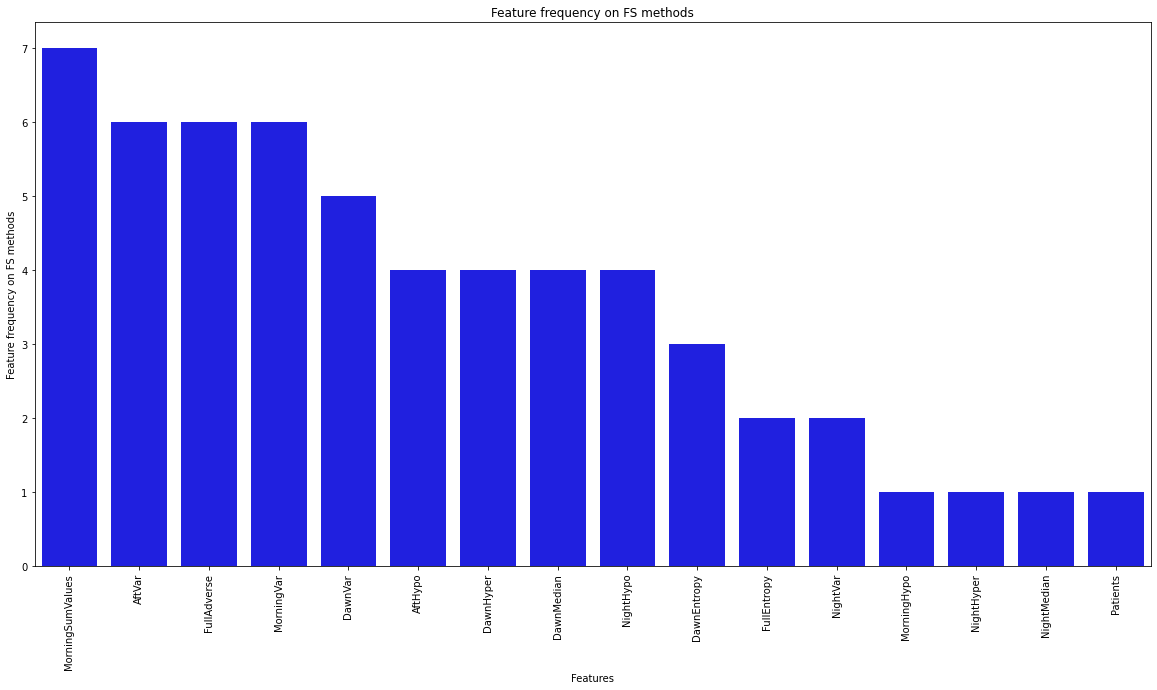

In [59]:
results, ordered = results_fs([mutualinfo_var,chi2_var,dt_var,rf_var,lr_var, knnw_list, dtw_list, lrw_list])

In [60]:
selectedvariablesmi = ["MorningSumValues", "AftVar", "FullAdverse", "MorningVar", "DawnVar", "AftHypo", "DawnHyper",
                       "DawnMedian", "NightHypo", "DawnEntropy"]

In [ ]:
M\_SumValues, A\_Var, F\_Adverse, M\_Var, N\_Var, A\_Hypo, N\_Hyper, N\_Median, E\_Hypo, N\_Entropy

In [61]:
selection_res = pd.DataFrame()
names = ["Mutual Information","Chi Squared Test of Independence", "DT FI", "RF FI", "LR FI", "KNN Wrapper", "DT Wrapper", "LR Wrapper"]
e = 0
for i in [mutualinfo_var,chi2_var,dt_var,rf_var,lr_var, knnw_list, dtw_list, lrw_list]:
    selection_res[names[e]] = i
    e = e + 1

In [62]:
selection_res[:]

Mutual Information Chi Squared Test of Independence        DT FI  \
0         FullAdverse                       MorningVar  FullAdverse   
1    MorningSumValues                          DawnVar   NightHyper   
2          MorningVar                           AftVar     Patients   
3           NightHypo                 MorningSumValues          ---   
4             DawnVar                         NightVar          ---   
5         FullEntropy                      FullAdverse          ---   
6         MorningHypo                       DawnMedian          ---   
7         DawnEntropy                              ---          ---   
8             AftHypo                              ---          ---   
9           DawnHyper                              ---          ---   
10             AftVar                              ---          ---   

               RF FI             LR FI       KNN Wrapper        DT Wrapper  \
0        FullEntropy       NightMedian       FullAdverse       FullAdverse   
1   MorningSumValues        DawnMedian  MorningSumValues  MorningSumValues   
2                ---  MorningSumValues           AftHypo           AftHypo   
3                ---        MorningVar         NightHypo         NightHypo   
4                ---           DawnVar            AftVar            AftVar   
5                ---          NightVar        MorningVar        MorningVar   
6                ---            AftVar         DawnHyper         DawnHyper   
7                ---               ---        DawnMedian               ---   
8                ---               ---           DawnVar               ---   
9                ---               ---       DawnEntropy               ---   
10               ---               ---               ---               ---   

          LR Wrapper  
0        FullAdverse  
1   MorningSumValues  
2            AftHypo  
3          NightHypo  
4             AftVar  
5         MorningVar  
6          DawnHyper  
7         DawnMedian  
8            DawnVar  
9        DawnEntropy  
10               ---

<div class="alert alert-block alert-warning">
    
# GENERAL EVALUATION
    
</div>

In [29]:
loo = LeaveOneOut()
loo.get_n_splits(X_train)

32

In [30]:
lr_param_grid = {"penalty": ["l1", "l2", "none"],
                "C": [0.01, 0.001, 0.1, 1, 10]}

svm_param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
                 "C": [0.01, 0.001, 0.1, 1, 10],
                 "gamma": [0.01, 0.001, 0.1, 1, 10]}

dt_param_grid = {"criterion": ["gini", "entropy"],
                "max_depth": [2,3,4,5,6,7,8],
                "min_samples_split": [2,3,4,5,6,7,8,9,10],
                "min_samples_leaf": [2,3,4,5,6,7,8,9,10]}

rf_param_grid = {"n_estimators":np.arange(1,25,5),
                "criterion": ["gini", "entropy"],
                "max_depth": [2,3,4,5,6],
                "min_samples_split": [2,3,4,5,6],
                "min_samples_leaf": [2,3,4,5,6]}

In [31]:
shap.initjs()

<div class="alert alert-block alert-warning">
    
## REPEATED EVALUATION
    
</div>

In [32]:
def meanl(p):
    globallist = []

    for idx in range(len(p[0])):
        listametric = []
        for lst in p:
            listametric.append(lst[idx])
        media = np.round(np.mean(listametric),3)
        desv = np.round(np.std(listametric),3)
        name = str(media) + "+/-" + str(desv)
        globallist.append(name)

    return globallist

In [33]:
def repeated_evaluation(classifier_name, tabdf_later, selected_variables):
    acc = []
    f1list = []
    sensitivitylist = []
    specificitylist = []
    MAX_ITERS = 20000
    train_indexes = [[22, 21, 2, 10, 1, 3, 6, 11, 24, 9, 19, 8, 5, 17, 25, 14], [6, 4, 21, 24, 10, 18, 9, 1, 14, 23, 3, 13, 17, 11, 25, 8], [10, 25, 19, 24, 13, 8, 6, 18, 21, 11, 14, 17, 9, 5, 23, 2], [17, 18, 9, 19, 3, 12, 14, 23, 20, 24, 5, 13, 11, 4, 2, 15], [2, 24, 13, 10, 19, 5, 8, 4, 25, 3, 18, 12, 20, 21, 1, 22]]
    test_indexes = [[12, 13, 15, 18, 20, 23], [2, 5, 12, 15, 19, 20, 22], [1, 3, 4, 12, 15, 20, 22], [1, 6, 8, 10, 21, 22, 25], [6, 9, 11, 14, 15, 17, 23]]
#     print('preee', selected_variables)
    selected_variables.append("Patients")
#     print('pooost', selected_variables)
    
    X = tabdf_later[selected_variables]
    y = tabdf_later[["Cat", "Patients"]]
    
    for idx, values in enumerate(train_indexes):
        X_train = X[X["Patients"].isin(train_indexes[idx])]
        X_train = X_train[selected_variables]
        
#         print('traaain', X_train.columns)
        X_train.drop('Patients', axis = 1, inplace = True)
        X_test = X[X["Patients"].isin(test_indexes[idx])]
        X_test = X_test[selected_variables]
        X_test.drop('Patients', axis = 1,inplace = True)
        y_train = y[y["Patients"].isin(train_indexes[idx])]
        y_train = y_train['Cat']
        y_test = y[y["Patients"].isin(test_indexes[idx])]
        y_test = y_test['Cat']
        
        scaler = StandardScaler()
        x_train_raw = X_train.copy()
        x_test_raw = X_test.copy()
        scaler.fit(X_train)
        X_train_norm = pd.DataFrame(data = scaler.transform(X_train), columns = list(x_train_raw.columns))
        X_test_norm = pd.DataFrame(data = scaler.transform(X_test), columns = list(x_train_raw.columns))

        seed_value = 8

        if classifier_name == 'svm':
            dict_param_grid_classifier = {'C': np.linspace(0.01, 10),'gamma': ['auto', 'scale']}
            
            grid = GridSearchCV(SVC(max_iter=MAX_ITERS, random_state=seed_value), dict_param_grid_classifier, cv = loo, scoring = 'accuracy',return_train_score=True)
            grid.fit(X_train_norm,y_train)
            best_params = grid.best_params_

            modelo = SVC(**best_params, max_iter=MAX_ITERS, random_state=seed_value).fit(X_train_norm, y_train)
            y_pred = modelo.predict(X_test_norm)

            acc_test = acc.append(accuracy_score(y_test, y_pred))
            f1list.append(f1_score(y_test, y_pred))               
            cmknn = confusion_matrix(y_test,y_pred)
            sensitivitylist.append(cmknn[0][0]/(cmknn[0][0]+cmknn[1][0]))
            specificitylist.append(cmknn[1][1]/(cmknn[1][1]+cmknn[0][1]))
            
            # SHAP
            explainer = shap.KernelExplainer(modelo.predict_proba, X_test_norm)
            shap_values = explainer.shap_values(X_test_norm)
            print(shap_values)
            shap_expected = explainer.expected_value
            print(shap_expected)

            plt.figure()
            shap.summary_plot(shap_values[1], X_test_norm, plot_type="bar", show = False)
            name_sum = 'fsl_shapbar_'+classifier_name+str(idx)+'.pdf'
            plt.savefig(name_sum, bbox_inches='tight')

            plt.figure()
            name_bar = 'fsl_shapsum_'+classifier_name+str(idx)+'.pdf'
            shap.summary_plot(shap_values[1], X_test_norm, show = False);
            plt.savefig(name_bar, bbox_inches='tight')


        elif classifier_name == 'knn':
            dict_param_grid_classifier = {'n_neighbors': np.arange(1, 12, 1)}
            grid = GridSearchCV(KNeighborsClassifier(), dict_param_grid_classifier, cv = loo, scoring = 'accuracy',return_train_score=True)
            grid.fit(X_train_norm,y_train)
            best_params = grid.best_params_

            modelo = KNeighborsClassifier(**best_params).fit(X_train_norm, y_train)
            y_pred = modelo.predict(X_test_norm)

            acc_test = acc.append(accuracy_score(y_test, y_pred))
            f1list.append(f1_score(y_test, y_pred))               
            cmknn = confusion_matrix(y_test,y_pred)
            sensitivitylist.append(cmknn[0][0]/(cmknn[0][0]+cmknn[1][0]))
            specificitylist.append(cmknn[1][1]/(cmknn[1][1]+cmknn[0][1]))
            
            # SHAP
            explainer = shap.KernelExplainer(modelo.predict_proba, X_test_norm)
            shap_values = explainer.shap_values(X_test_norm)
            print(shap_values)
            shap_expected = explainer.expected_value
            print(shap_expected)

            plt.figure()
            shap.summary_plot(shap_values[1], X_test_norm, plot_type="bar", show = False)
            name_sum = 'fsl_shapbar_'+classifier_name+str(idx)+'.pdf'
            plt.savefig(name_sum, bbox_inches='tight')

            plt.figure()
            name_bar = 'fsl_shapsum_'+classifier_name+str(idx)+'.pdf'
            shap.summary_plot(shap_values[1], X_test_norm, show = False);
            plt.savefig(name_bar, bbox_inches='tight')

        elif classifier_name == 'lr':
            dict_param_grid_classifier = {'penalty': ['l1', 'l2', 'elasticnet', None]}
            grid = GridSearchCV(LogisticRegression(random_state=seed_value), dict_param_grid_classifier, cv = loo, scoring = 'accuracy',return_train_score=True)
            grid.fit(X_train_norm,y_train)
            best_params = grid.best_params_

            modelo = LogisticRegression(**best_params,random_state=seed_value).fit(X_train_norm, y_train)
            y_pred = modelo.predict(X_test_norm)

            acc_test = acc.append(accuracy_score(y_test, y_pred))
            f1list.append(f1_score(y_test, y_pred))               
            cmknn = confusion_matrix(y_test,y_pred)
            sensitivitylist.append(cmknn[0][0]/(cmknn[0][0]+cmknn[1][0]))
            specificitylist.append(cmknn[1][1]/(cmknn[1][1]+cmknn[0][1]))
            
            # SHAP
            explainer = shap.KernelExplainer(modelo.predict_proba, X_test_norm)
            shap_values = explainer.shap_values(X_test_norm)
            print(shap_values)
            shap_expected = explainer.expected_value
            print(shap_expected)

            plt.figure()
            shap.summary_plot(shap_values[1], X_test_norm, plot_type="bar", show = False)
            name_sum = 'fsl_shapbar_'+classifier_name+str(idx)+'.pdf'
            plt.savefig(name_sum, bbox_inches='tight')

            plt.figure()
            name_bar = 'fsl_shapsum_'+classifier_name+str(idx)+'.pdf'
            shap.summary_plot(shap_values[1], X_test_norm, show = False);
            plt.savefig(name_bar, bbox_inches='tight')

        
    print('acc',np.mean(acc), np.std(acc))
    print('sensit',np.mean(sensitivitylist), np.std(sensitivitylist))
    print('specfic',np.mean(specificitylist), np.std(specificitylist))
    print('f1',np.mean(f1list), np.std(f1list))

In [34]:
random.seed(3)
np.random.seed(3)


96 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------

  0%|          | 0/12 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

[array([[ 3.81627664e-02, -1.12473407e-05,  3.52084030e-01,
         4.66743984e-02,  1.03268895e-02,  4.64033401e-02,
         1.59366945e-03,  1.35675345e-03, -1.91855836e-03,
         1.26263589e-03],
       [ 4.38796239e-02, -1.73815841e-05,  1.59810598e-01,
         1.57577748e-01,  2.05282045e-02, -1.62637239e-01,
         3.98061287e-02, -2.79119057e-03,  4.21776292e-02,
         2.45522584e-03],
       [ 6.01042649e-02,  5.30990625e-06,  4.41172052e-01,
         4.68313742e-03, -2.37610304e-02,  4.46085060e-02,
        -2.96248739e-02,  5.14328664e-04, -2.64202345e-03,
        -2.11882143e-03],
       [-3.08790766e-02, -1.87761287e-05, -2.47239752e-01,
        -5.68962069e-02,  1.74687277e-02,  7.40298346e-02,
         3.71049667e-02, -2.96629662e-03, -2.01729760e-02,
         2.20313419e-03],
       [ 6.66695408e-02, -1.33022220e-05,  3.62949035e-01,
         1.00554153e-03,  8.89558191e-03,  4.13691116e-02,
         1.67976141e-02, -1.15369082e-03,  5.15939464e-03,
         1


90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------

  0%|          | 0/14 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

[array([[ 7.51338119e-02,  6.37715184e-03,  1.23988038e-01,
         1.26164277e-02,  3.90034474e-03,  3.41402034e-02,
         2.37501358e-02,  6.67045841e-02, -2.01406813e-04,
        -4.68728313e-03],
       [ 6.71552110e-02, -2.45527647e-02,  2.37231169e-02,
         9.49262093e-03,  6.04394344e-03,  5.45627919e-02,
         3.77123263e-02,  1.10581107e-01, -9.26844267e-03,
        -7.06216612e-03],
       [ 4.26227908e-02, -1.96864959e-02,  3.12296681e-01,
         1.93691147e-02,  4.70388576e-03,  4.39907389e-02,
        -8.55558361e-03, -8.22134914e-02, -1.09918221e-03,
        -5.20522338e-03],
       [ 8.35922566e-02, -1.16383578e-03,  3.13583251e-01,
         4.46132928e-03, -8.56123463e-03,  3.60739753e-02,
        -6.11080593e-02, -3.10906188e-02, -7.95075984e-04,
         5.94738423e-03],
       [ 4.38720711e-02, -1.27644696e-02,  1.59548371e-01,
         4.15482111e-03,  6.43769615e-03, -4.26029182e-02,
         3.92843579e-02, -1.48210740e-02,  2.67481490e-02,
         1


96 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------

  0%|          | 0/12 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

[array([[ 3.11682788e-02,  4.15369552e-03,  2.47455983e-01,
         2.67567894e-02,  8.62143534e-03,  8.85958267e-02,
         6.52657948e-03, -2.88719999e-02,  8.53151843e-03,
        -1.78294328e-03],
       [ 1.65425779e-02, -7.65270623e-03,  2.31959368e-01,
        -6.82090079e-03,  7.67663209e-03,  7.99051877e-02,
         2.97603943e-02,  5.85824717e-02,  3.28393522e-04,
        -1.62991555e-03],
       [ 2.95869692e-02, -2.77366855e-02,  2.94925790e-01,
         2.84775779e-02,  8.25503269e-03,  8.49169438e-02,
         5.50498327e-03, -3.29712601e-02, -9.24667419e-05,
        -1.69393835e-03],
       [ 5.16789712e-02, -1.27115832e-02,  3.44410608e-01,
         1.64691569e-03, -1.58164134e-02,  7.51009615e-02,
        -3.88446507e-02, -5.23422449e-03, -2.84832418e-04,
         1.84160833e-03],
       [ 5.06043533e-02, -2.34041456e-02,  2.50103222e-01,
        -4.78218052e-04,  6.13706710e-03,  6.15082231e-02,
         2.38091879e-02,  4.66461923e-02,  6.43784732e-03,
        -1


90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------

  0%|          | 0/14 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

[array([[ 0.12142365,  0.00091498,  0.17144595,  0.05184535,  0.01305065,
         0.10002215,  0.01254078, -0.04270185,  0.0045342 ,  0.01046   ],
       [ 0.12036209,  0.0265583 ,  0.16641233,  0.01109748,  0.00926484,
         0.06777019,  0.03304044,  0.03388079, -0.00187923,  0.0073739 ],
       [ 0.15846932,  0.0106252 ,  0.12538023,  0.00636875,  0.0103595 ,
         0.07543568,  0.03762363,  0.03788197,  0.00067008,  0.00814249],
       [-0.07695704,  0.08590262,  0.17183054,  0.08880162, -0.01460596,
         0.00727496, -0.16680084, -0.02786976, -0.00439512, -0.01896793],
       [ 0.12853937,  0.03147282,  0.09316276,  0.15102698,  0.00863547,
         0.0611548 ,  0.00713889, -0.01134632, -0.00169738,  0.00681027],
       [ 0.09320592,  0.00234628,  0.09695556,  0.0198753 ,  0.01667443,
         0.12343204,  0.01588912, -0.05327454,  0.00143232,  0.01352381],
       [-0.10373692, -0.06833481, -0.18555774, -0.24347607,  0.00746693,
         0.06656862,  0.05056682,  0.0143806


90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hugoc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------

  0%|          | 0/14 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

[array([[ 6.44473627e-02,  1.55899520e-02,  2.67925650e-01,
        -2.51745546e-03,  1.45071952e-02,  8.40934876e-02,
        -2.33732269e-02,  5.92121336e-02, -3.42851440e-02,
         2.53537094e-02],
       [ 1.86618776e-02,  3.11901351e-02,  2.19463582e-01,
         5.15929269e-03,  1.84277542e-02,  1.09781666e-01,
        -2.98477304e-02,  7.79233809e-02, -4.22552009e-02,
         3.21773773e-02],
       [ 4.70522308e-02, -1.34537312e-02,  1.33446364e-01,
        -1.36219993e-02,  2.53952716e-02,  1.42552520e-01,
        -4.06014680e-02,  3.20525508e-02, -5.68030748e-02,
         4.29890615e-02],
       [-2.79512354e-02, -1.33506620e-02, -1.18794806e-02,
         6.43384386e-02, -7.44237881e-03, -8.28867635e-02,
        -1.16195720e-02,  3.58254124e-02, -6.99648316e-02,
        -9.55599662e-03],
       [ 8.03227701e-02, -5.03230866e-03,  3.11113806e-01,
        -1.02755757e-02, -1.02447487e-02,  9.01618896e-02,
         2.76441975e-02, -1.21308829e-02,  3.90848742e-03,
        -1

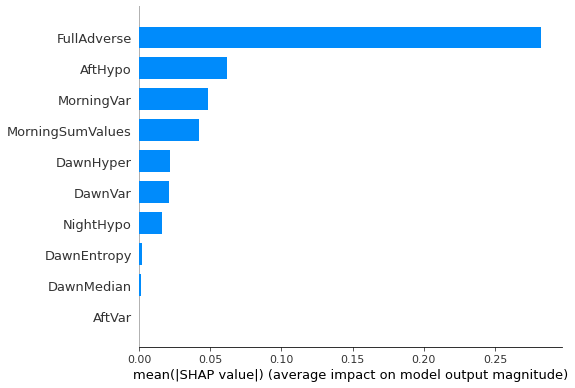

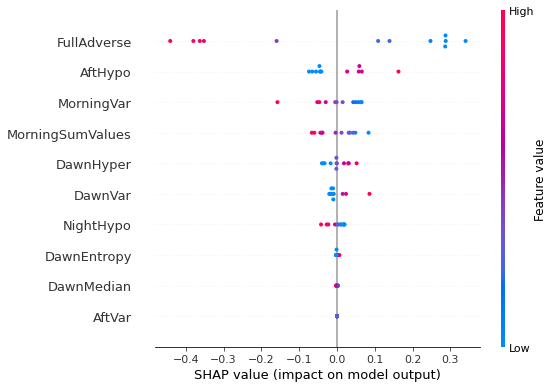

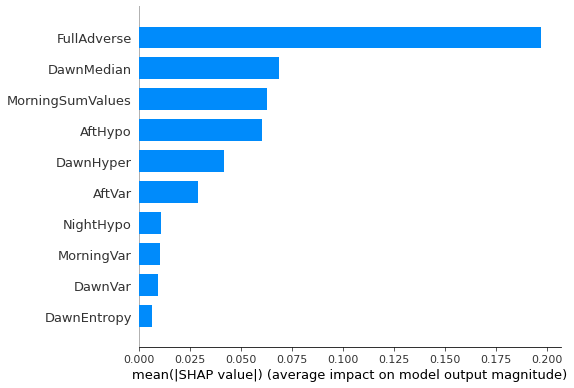

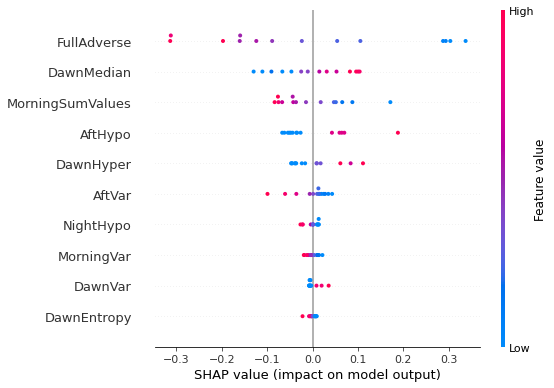

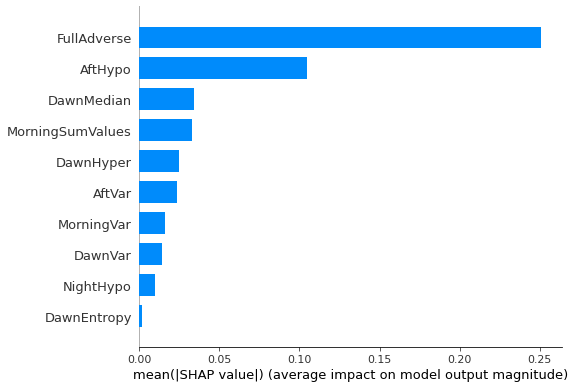

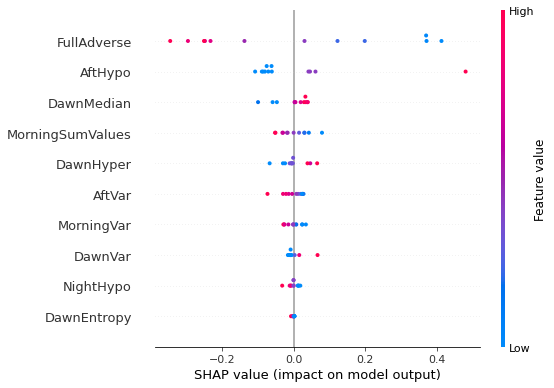

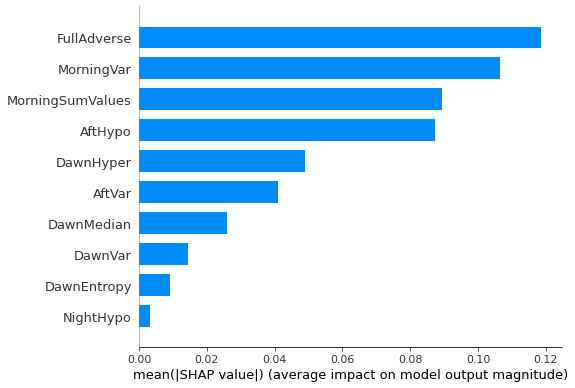

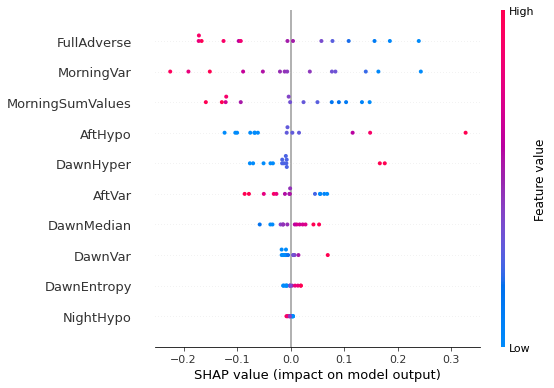

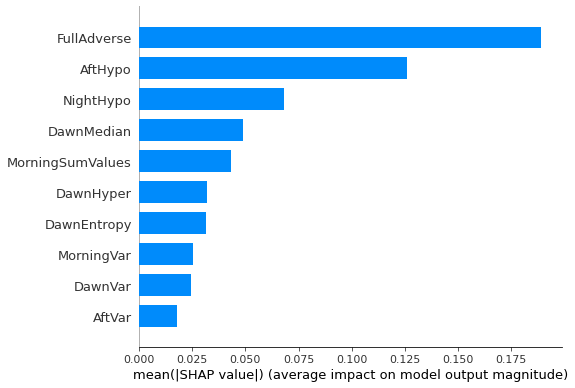

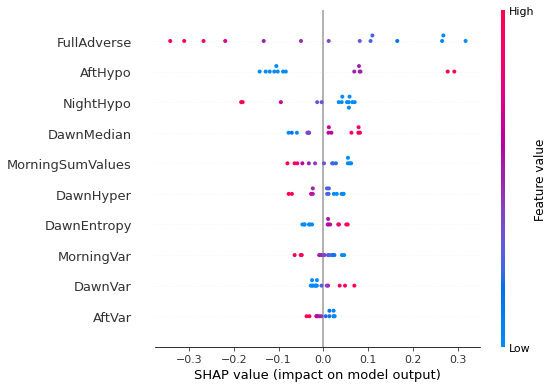

In [35]:
selectedvar = ["MorningSumValues", "AftVar", "FullAdverse", "MorningVar", "DawnVar", "AftHypo", "DawnHyper",
                       "DawnMedian", "NightHypo", "DawnEntropy"]
repeated_evaluation('lr', tabdf_later, selectedvar)

In [72]:
selectedvar = ["MorningSumValues", "AftVar", "FullAdverse", "MorningVar", "DawnVar", "AftHypo", "DawnHyper",
                       "DawnMedian", "NightHypo", "DawnEntropy"]
repeated_evaluation('knn', tabdf_later, selectedvar)

acc 0.8642857142857142 0.05302632726504783
sensit 0.8511904761904763 0.015971914124998474
specfic 0.8880952380952382 0.09805362039035238
f1 0.8645288045288047 0.04605505315237536


In [73]:
selectedvar = ["MorningSumValues", "AftVar", "FullAdverse", "MorningVar", "DawnVar", "AftHypo", "DawnHyper",
                       "DawnMedian", "NightHypo", "DawnEntropy"]
repeated_evaluation('svm', tabdf_later, selectedvar)

acc 0.8261904761904763 0.11408712905438989
sensit 0.8367965367965369 0.1472854261559229
specfic 0.8642857142857142 0.1203735681882337
f1 0.8074725274725274 0.14297949114153027
